# Titanic project : to learn ml model 

## flow :
    1. 資料觀察
    2. 資料分析
    3. 建置模型
    4. 模型調優
    5. 結論

In [1]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
sub_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [2]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
sub_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


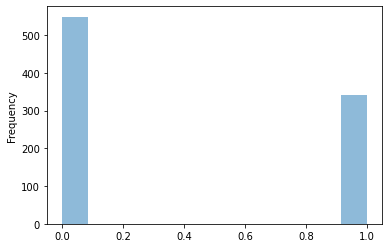

In [8]:
ax = train_df['Survived'].plot.hist(bins=12, alpha=0.5)

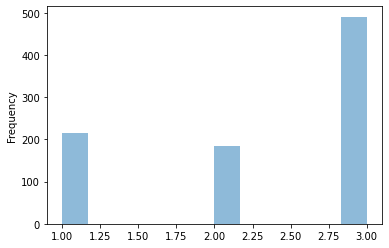

In [9]:
ax = train_df['Pclass'].plot.hist(bins=12, alpha=0.5)

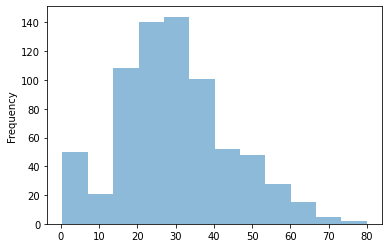

In [10]:
ax = train_df['Age'].plot.hist(bins=12, alpha=0.5)

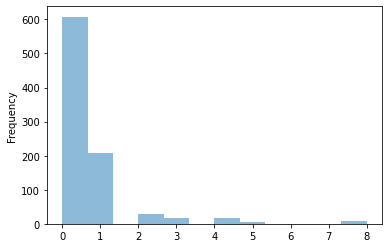

In [11]:
ax = train_df['SibSp'].plot.hist(bins=12, alpha=0.5)

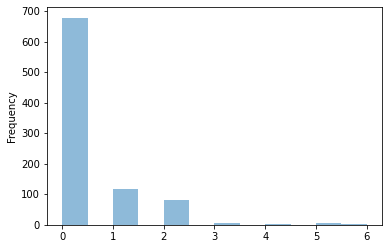

In [12]:
ax = train_df['Parch'].plot.hist(bins=12, alpha=0.5)

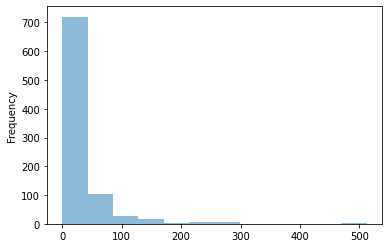

In [13]:
# Fare	Cabin	Embarked
ax = train_df['Fare'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:>

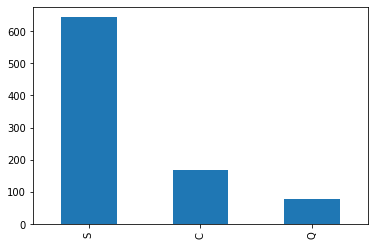

In [14]:
# ax = train_df['Embarked'].plot.hist(bins=12, alpha=0.5)
train_df['Embarked'].value_counts().plot(kind='bar')

<AxesSubplot:>

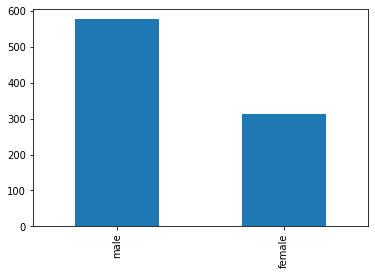

In [15]:

train_df['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

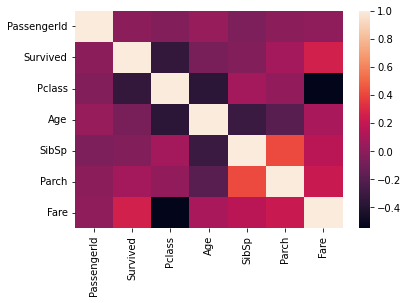

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df.corr()

sns.heatmap(train_df.corr())



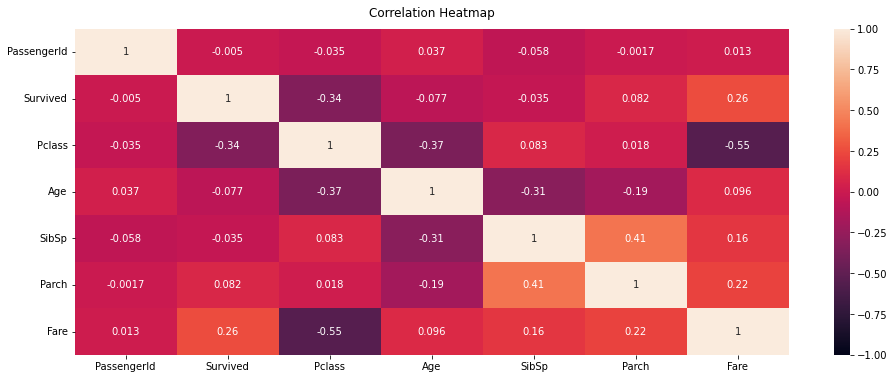

In [17]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [18]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
train_df['Name'].tolist()

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [20]:
train_df_name_list = train_df['Name'].tolist()

from collections import Counter 

counter_name = Counter(train_df_name_list)
counter_name


Counter({'Braund, Mr. Owen Harris': 1,
         'Cumings, Mrs. John Bradley (Florence Briggs Thayer)': 1,
         'Heikkinen, Miss. Laina': 1,
         'Futrelle, Mrs. Jacques Heath (Lily May Peel)': 1,
         'Allen, Mr. William Henry': 1,
         'Moran, Mr. James': 1,
         'McCarthy, Mr. Timothy J': 1,
         'Palsson, Master. Gosta Leonard': 1,
         'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)': 1,
         'Nasser, Mrs. Nicholas (Adele Achem)': 1,
         'Sandstrom, Miss. Marguerite Rut': 1,
         'Bonnell, Miss. Elizabeth': 1,
         'Saundercock, Mr. William Henry': 1,
         'Andersson, Mr. Anders Johan': 1,
         'Vestrom, Miss. Hulda Amanda Adolfina': 1,
         'Hewlett, Mrs. (Mary D Kingcome) ': 1,
         'Rice, Master. Eugene': 1,
         'Williams, Mr. Charles Eugene': 1,
         'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)': 1,
         'Masselmani, Mrs. Fatima': 1,
         'Fynney, Mr. Joseph J': 1,
         'Beesley, Mr

In [21]:
tmp_name = train_df_name_list[8]
str2 = tmp_name.split(' ')
print(str2)

['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)']


In [22]:
title_list = []
# title_rule_list = ['Mr.', 'Mrs.', 'Miss.','Master.','Dr.','Lady.','Sir.','Ms.']
title_rule_list = ['Mr.', 'Mrs.', 'Miss.','Master.']
for name in train_df_name_list : 
    
    tmp =name.split(' ')[1]
    if tmp in title_rule_list:
        title_list.append(tmp)
    
    else:
        for title_rule in title_rule_list:
            if title_rule in name:
                title_list.append(title_rule)
                break
        else:
            title_list.append('Others')
    
counter_title = Counter(title_list)
counter_title

train_df['name_title'] = title_list
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [23]:
train_df['Ticket'].tolist()

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP 9549',
 '113783',
 'A/5. 2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC 17601',
 'PC 17569',
 '335677',
 'C.A. 24579',
 'PC 17604',
 '113789',
 '2677',
 'A./5. 2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SC/Paris 2123',
 '330958',
 'S.C./A.4. 23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A/4. 39886',
 'PC 17572',
 '2926',
 '113509',
 '19947',
 'C.A. 31026',
 '2697',
 'C.A. 34651',
 'CA 2144',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC 17605',
 '2661',
 'C.A. 29395',
 'S.P. 3464',
 '3101281',
 '315151',
 'C.A. 33111',
 'CA 2144',
 'S.O.C. 14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 'SO/C 14885',
 '310

In [24]:
train_df_ticket_list = train_df['Ticket'].tolist()

ticket_catgorical_list = []

for ticket in train_df_ticket_list:
    
    
    if ticket.isdigit():
        #全數字的
        ticket_catgorical_list.append(len(ticket))
    else:
        ticket_catgorical_list.append(0)

counter_ticket = Counter(ticket_catgorical_list)
counter_ticket


Counter({0: 230, 6: 415, 5: 131, 4: 97, 7: 16, 3: 2})

In [25]:
train_df['ticket_cat'] = ticket_catgorical_list
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,ticket_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,6
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,6


In [26]:
# train_df['Sex'].apply()

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
tmp_df = onehotencoder.fit_transform(train_df[['Sex']]).toarray()
tmp_df = pd.DataFrame(tmp_df, columns=['female','male'])
train_df = pd.concat([train_df,tmp_df],axis = 1)

In [27]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,ticket_cat,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,6,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,6,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,6,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,6,0.0,1.0


In [28]:
del train_df['PassengerId'], train_df['Name'], train_df['Sex'], train_df['Ticket'], train_df['Cabin']
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,0,3,22.0,1,0,7.2500,S,Mr.,0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,Mrs.,0,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,Miss.,0,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,Mrs.,6,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,Mr.,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Others,6,0.0,1.0
887,1,1,19.0,0,0,30.0000,S,Miss.,6,1.0,0.0
888,0,3,NaN,1,2,23.4500,S,Miss.,0,1.0,0.0
889,1,1,26.0,0,0,30.0000,C,Mr.,6,0.0,1.0


In [29]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,0,3,22.0,1,0,7.2500,S,Mr.,0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,Mrs.,0,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,Miss.,0,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,Mrs.,6,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,Mr.,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Others,6,0.0,1.0
887,1,1,19.0,0,0,30.0000,S,Miss.,6,1.0,0.0
888,0,3,NaN,1,2,23.4500,S,Miss.,0,1.0,0.0
889,1,1,26.0,0,0,30.0000,C,Mr.,6,0.0,1.0


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# data_le=pd.DataFrame(dic)
tmp = labelencoder.fit_transform(train_df['name_title'])
tmp = tmp.tolist()
train_df['name_title'] = tmp
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,0,3,22.0,1,0,7.2500,S,2,0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,3,0,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,1,0,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,3,6,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,2,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,4,6,0.0,1.0
887,1,1,19.0,0,0,30.0000,S,1,6,1.0,0.0
888,0,3,NaN,1,2,23.4500,S,1,0,1.0,0.0
889,1,1,26.0,0,0,30.0000,C,2,6,0.0,1.0


In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# data_le=pd.DataFrame(dic)
tmp = labelencoder.fit_transform(train_df['Embarked'])
tmp = tmp.tolist()
train_df['Embarked'] = tmp
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,0,3,22.0,1,0,7.2500,2,2,0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0,3,0,1.0,0.0
2,1,3,26.0,0,0,7.9250,2,1,0,1.0,0.0
3,1,1,35.0,1,0,53.1000,2,3,6,1.0,0.0
4,0,3,35.0,0,0,8.0500,2,2,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,4,6,0.0,1.0
887,1,1,19.0,0,0,30.0000,2,1,6,1.0,0.0
888,0,3,NaN,1,2,23.4500,2,1,0,1.0,0.0
889,1,1,26.0,0,0,30.0000,0,2,6,0.0,1.0


In [ ]:
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)
# df['ColA'].fillna(value=df['ColA'].mean(), inplace=True)
train_df

## model

In [33]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X_train, y_train = train_df.drop(columns=['Survived']), train_df['Survived']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9876543209876543


In [54]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,2


In [55]:

# processing name
test_df_name_list = test_df['Name'].tolist()

title_list = []
title_rule_list = ['Mr.', 'Mrs.', 'Miss.','Master.']
for name in test_df_name_list : 
    
    tmp =name.split(' ')[1]
    if tmp in title_rule_list:
        title_list.append(tmp)
    
    else:
        for title_rule in title_rule_list:
            if title_rule in name:
                title_list.append(title_rule)
                break
        else:
            title_list.append('Others')
    
counter_title = Counter(title_list)
counter_title

test_df['name_title'] = title_list
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,1,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,2,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,1,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,2,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,2,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,2,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,0,Others
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,Mr.
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,2,Mr.


In [56]:
# processing Ticket
test_df_ticket_list = test_df['Ticket'].tolist()

ticket_catgorical_list = []

for ticket in test_df_ticket_list:
    
    
    if ticket.isdigit():
        #全數字的
        ticket_catgorical_list.append(len(ticket))
    else:
        ticket_catgorical_list.append(0)

counter_ticket = Counter(ticket_catgorical_list)
counter_ticket
test_df['ticket_cat'] = ticket_catgorical_list
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,ticket_cat
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,1,Mr.,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,2,Mrs.,6
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,1,Mr.,6
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,2,Mr.,6
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,2,Mrs.,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,2,Mr.,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,0,Others,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,Mr.,0
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,2,Mr.,6


In [57]:
# process Sex

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
tmp_df = onehotencoder.fit_transform(test_df[['Sex']]).toarray()
tmp_df = pd.DataFrame(tmp_df, columns=['female','male'])
test_df = pd.concat([test_df,tmp_df],axis = 1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,ticket_cat,female,male
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,1,Mr.,6,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,2,Mrs.,6,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,1,Mr.,6,0.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,2,Mr.,6,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,2,Mrs.,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,2,Mr.,0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,0,Others,0,1.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,Mr.,0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,2,Mr.,6,0.0,1.0


In [58]:
# del test_df['PassengerId'], test_df['Name'], test_df['Sex'], test_df['Ticket'], test_df['Cabin']
del  test_df['Name'], test_df['Sex'], test_df['Ticket'], test_df['Cabin']
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,892,3,34.500000,0,0,7.8292,1,Mr.,6,0.0,1.0
1,893,3,47.000000,1,0,7.0000,2,Mrs.,6,1.0,0.0
2,894,2,62.000000,0,0,9.6875,1,Mr.,6,0.0,1.0
3,895,3,27.000000,0,0,8.6625,2,Mr.,6,0.0,1.0
4,896,3,22.000000,1,1,12.2875,2,Mrs.,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.699118,0,0,8.0500,2,Mr.,0,0.0,1.0
414,1306,1,39.000000,0,0,108.9000,0,Others,0,1.0,0.0
415,1307,3,38.500000,0,0,7.2500,2,Mr.,0,0.0,1.0
416,1308,3,29.699118,0,0,8.0500,2,Mr.,6,0.0,1.0


In [59]:
# process name label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# data_le=pd.DataFrame(dic)
tmp = labelencoder.fit_transform(test_df['name_title'])
tmp = tmp.tolist()
test_df['name_title'] = tmp
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,892,3,34.500000,0,0,7.8292,1,2,6,0.0,1.0
1,893,3,47.000000,1,0,7.0000,2,3,6,1.0,0.0
2,894,2,62.000000,0,0,9.6875,1,2,6,0.0,1.0
3,895,3,27.000000,0,0,8.6625,2,2,6,0.0,1.0
4,896,3,22.000000,1,1,12.2875,2,3,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.699118,0,0,8.0500,2,2,0,0.0,1.0
414,1306,1,39.000000,0,0,108.9000,0,4,0,1.0,0.0
415,1307,3,38.500000,0,0,7.2500,2,2,0,0.0,1.0
416,1308,3,29.699118,0,0,8.0500,2,2,6,0.0,1.0


In [60]:
# process Embarked
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# data_le=pd.DataFrame(dic)
tmp = labelencoder.fit_transform(test_df['Embarked'])
tmp = tmp.tolist()
test_df['Embarked'] = tmp
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,892,3,34.500000,0,0,7.8292,1,2,6,0.0,1.0
1,893,3,47.000000,1,0,7.0000,2,3,6,1.0,0.0
2,894,2,62.000000,0,0,9.6875,1,2,6,0.0,1.0
3,895,3,27.000000,0,0,8.6625,2,2,6,0.0,1.0
4,896,3,22.000000,1,1,12.2875,2,3,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.699118,0,0,8.0500,2,2,0,0.0,1.0
414,1306,1,39.000000,0,0,108.9000,0,4,0,1.0,0.0
415,1307,3,38.500000,0,0,7.2500,2,2,0,0.0,1.0
416,1308,3,29.699118,0,0,8.0500,2,2,6,0.0,1.0


In [61]:
test_df['Age'].fillna(value=test_df['Age'].mean(), inplace=True)
# df['ColA'].fillna(value=df['ColA'].mean(), inplace=True)
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
0,892,3,34.500000,0,0,7.8292,1,2,6,0.0,1.0
1,893,3,47.000000,1,0,7.0000,2,3,6,1.0,0.0
2,894,2,62.000000,0,0,9.6875,1,2,6,0.0,1.0
3,895,3,27.000000,0,0,8.6625,2,2,6,0.0,1.0
4,896,3,22.000000,1,1,12.2875,2,3,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.699118,0,0,8.0500,2,2,0,0.0,1.0
414,1306,1,39.000000,0,0,108.9000,0,4,0,1.0,0.0
415,1307,3,38.500000,0,0,7.2500,2,2,0,0.0,1.0
416,1308,3,29.699118,0,0,8.0500,2,2,6,0.0,1.0


In [69]:
del test_df['PassengerId']

In [70]:
test_df['Fare'].fillna(value=test_df['Age'].mean(), inplace=True)

# predict

In [71]:
X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_cat,female,male
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.154603,0.447368,0.392344,35.614096,1.401914,1.918660,3.870813,0.363636,0.636364
std,0.841838,12.636666,0.896760,0.981429,55.841142,0.854496,0.788458,2.576887,0.481622,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,2.000000,2.000000,5.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.471875,2.000000,2.000000,6.000000,1.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,2.000000,4.000000,7.000000,1.000000,1.000000


In [72]:
# X_train, y_train = train_df.drop(columns=['Survived']), train_df['Survived']
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
X_test = test_df
y_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [75]:
sub_df['Survived'] = y_pred
sub_df.to_csv('./submission.csv', index =False)

In [76]:
sub_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
